## Cost Prediction on acquiring Customers.

### Section 1 : Business Understanding
**1.What is the #1 factor driving sales?**<br>
**2.What is the next factor that drives sales?**<br>
**3.What are the factors that lead to low sales?**<br>
**4.What kind of advertising is the most profitable?**<br>

#### Import modules

Import the necessary modules for data management and data presentation.

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Section 2 : Data Understanding

#### Gather data

loading data csv

In [29]:
df = pd.read_csv('media prediction and its cost.csv')
df.shape

(60428, 40)

In [30]:
df.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


### Section 3 : Data preparation

Select the object type and use the get_dummies function to extract it and make the numeric data easy to relate to.

In [31]:
cat_vars = df.select_dtypes(include=[object] )
for var in cat_vars:
    df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

In [32]:
df.head()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,...,"media_type_Daily Paper, Radio","media_type_Daily Paper, Radio, TV",media_type_In-Store Coupon,media_type_Product Attachment,media_type_Radio,media_type_Street Handout,media_type_Sunday Paper,"media_type_Sunday Paper, Radio","media_type_Sunday Paper, Radio, TV",media_type_TV
0,7.36,2.7232,4.0,1.0,1.0,1.0,1.0,1.84,19.70,17.70,...,1,0,0,0,0,0,0,0,0,0
1,5.52,2.5944,3.0,0.0,4.0,0.0,4.0,1.84,19.70,17.70,...,1,0,0,0,0,0,0,0,0,0
2,3.68,1.3616,2.0,4.0,1.0,0.0,1.0,1.84,19.70,17.70,...,1,0,0,0,0,0,0,0,0,0
3,3.68,1.1776,2.0,2.0,2.0,2.0,2.0,1.84,19.70,17.70,...,0,0,1,0,0,0,0,0,0,0
4,4.08,1.4280,3.0,0.0,2.0,0.0,2.0,1.36,7.12,5.11,...,0,0,0,0,1,0,0,0,0,0


In [33]:
df.shape

(60428, 314)

find the relationship of the data

In [34]:
corr = df.corr()

Choose the most relevant information about 15 factors (18 drop 3).

In [35]:
#The 3 columns are dropped because they are directly related to sales.
larg = pd.DataFrame(corr['unit_sales(in millions)'].nlargest(18).drop(['unit_sales(in millions)','store_sales(in millions)','store_cost(in millions)']))

Choose the variable opposite of sales 15 factors

In [36]:
small = pd.DataFrame(corr['unit_sales(in millions)'].nsmallest(15))

Create a correlation graph with unit_sales

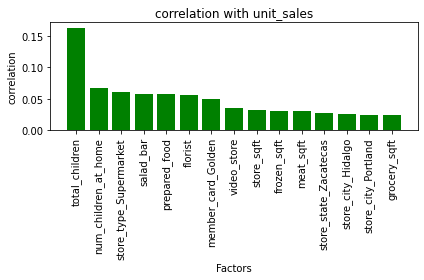

In [37]:
plt.bar(larg.index,larg['unit_sales(in millions)'],color = 'green')
plt.xlabel('Factors')
plt.xticks(rotation=90)
plt.ylabel('correlation')
plt.title('correlation with unit_sales')
plt.show()

> This graph shows the correlation per 1 million sales, most notably the number of children. With a very high positive correlation, even children at home were involved. Food type, location. And many things are very effective.

Split data to create graphs.

In [38]:
def Chooseindexdata(step=2):
    """
    Choose index of dataframe to plot the graph

    Args:
        step (float, optional): step of percentile . Defaults to 2.

    Returns:
        list: list of index
    """
    indexline = []
    for i in np.arange(0.00,1,step/100.0):
        indexline.append(round(len(df.index)*i))
    return indexline

### Section 4 : Evaluation

**Question 1 What is the #1 factor driving sales?**

In [39]:
#Select the factors that I would like to present.
linechart1 = df[['unit_sales(in millions)','total_children','num_children_at_home']]

In [40]:
linechart1 = linechart1.iloc[Chooseindexdata(3)].reset_index()
linechart1.drop(['index'],axis=1,inplace=True)

Create a line graph and distribution graph showing the relationship.
- unit_sales(in millions)
- total_children
- num_children_at_home

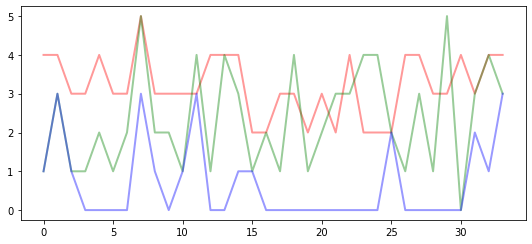

In [41]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.plot(linechart1['unit_sales(in millions)'], c='red', alpha=0.4, lw=2)
plt.plot(linechart1['total_children'], c='green', alpha=0.4,lw=2)
plt.plot(linechart1['num_children_at_home'], c='blue', alpha=0.4,lw=2)
plt.show()

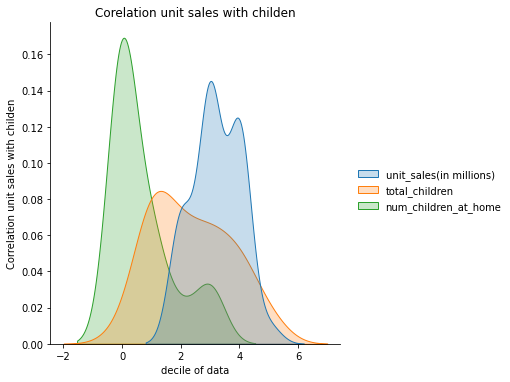

In [42]:
p =sns.displot(data=linechart1, kind="kde",fill=True).set(title="Corelation unit sales with childen",xlabel="decile of data" ,ylabel="Correlation unit sales with childen")

> From the graph, it was found that when parents had children cause a lot of sales including children at home It’s a very consistent variation.

**Question 2 What is the next factor that drives sales?**

Create a distribution graph showing the relationship.
- unit_sales(in millions)
- store_type_Supermarket
- salad_bar
- prepared_food

In [43]:
linechart2 = df[['unit_sales(in millions)','store_type_Supermarket','salad_bar','prepared_food']]
linechart2 = linechart2.iloc[Chooseindexdata(1)].reset_index()
linechart2.drop(['index'],axis=1,inplace=True)

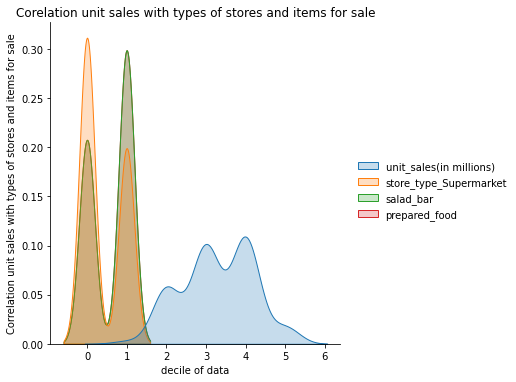

In [44]:
p =sns.displot(data=linechart2, kind="kde",fill=True).set(title="Corelation unit sales with types of stores and items for sale",xlabel="decile of data" ,ylabel="Correlation unit sales with types of stores and items for sale")

> The graph shows that when selling at supermarkets and selling salads and flowers Over time, sales will increase. But not as important as children.

**Question 3 What are the factors that lead to low sales?**

Create a volume bar graph.

C:\Users\ninen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


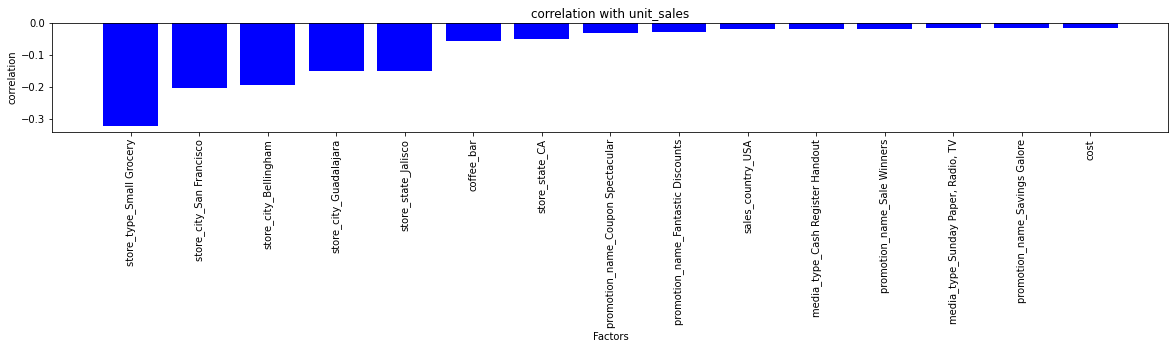

In [45]:
plt.figure(figsize=(20, 2))
plt.bar(small.index,small['unit_sales(in millions)'],color = 'blue')
plt.xlabel('Factors')
plt.xticks(rotation=90)
plt.ylabel('correlation')
plt.title('correlation with unit_sales')
plt.show()

> The graph shows that the grocery store has the lowest sales. But it’s normal because the size of the grocery store isn’t that big. And its locations in San Francisco, Bellingham and Guadalajara have resulted in low sales.

**Question 4 What kind of advertising is the most profitable?**

Create a new dataframe for advertising analytics.

In [46]:
ndf = pd.read_csv('media prediction and its cost.csv')

Select the columns associated with sales and media columns.

In [47]:
ndf = ndf[['media_type','store_sales(in millions)','store_cost(in millions)','unit_sales(in millions)']]
ndf = pd.concat([ndf.drop(['media_type'], axis=1), pd.get_dummies(ndf['media_type'], prefix='media_type', prefix_sep='_', drop_first=True)], axis=1)

In [54]:
ndfcorr = ndf.corr()
ndf.shape

(60428, 15)

In [55]:
ndf.head()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),media_type_Cash Register Handout,media_type_Daily Paper,"media_type_Daily Paper, Radio","media_type_Daily Paper, Radio, TV",media_type_In-Store Coupon,media_type_Product Attachment,media_type_Radio,media_type_Street Handout,media_type_Sunday Paper,"media_type_Sunday Paper, Radio","media_type_Sunday Paper, Radio, TV",media_type_TV
0,7.36,2.7232,4.0,0,0,1,0,0,0,0,0,0,0,0,0
1,5.52,2.5944,3.0,0,0,1,0,0,0,0,0,0,0,0,0
2,3.68,1.3616,2.0,0,0,1,0,0,0,0,0,0,0,0,0
3,3.68,1.1776,2.0,0,0,0,0,1,0,0,0,0,0,0,0
4,4.08,1.4280,3.0,0,0,0,0,0,0,1,0,0,0,0,0


correlation store_sales(in millions) with media type The most 3 are
- media_type_TV 
- media_type_Radio
- media_type_Product Attachment

In [56]:
ndfcorr['store_sales(in millions)'].nlargest(20)

store_sales(in millions)              1.000000
store_cost(in millions)               0.954685
unit_sales(in millions)               0.503482
media_type_TV                         0.006053
media_type_Radio                      0.005887
media_type_Product Attachment         0.005577
media_type_Daily Paper, Radio, TV     0.004711
media_type_Sunday Paper, Radio        0.002414
media_type_Daily Paper                0.001548
media_type_Street Handout             0.000146
media_type_In-Store Coupon           -0.002143
media_type_Sunday Paper              -0.003389
media_type_Daily Paper, Radio        -0.004099
media_type_Sunday Paper, Radio, TV   -0.007946
media_type_Cash Register Handout     -0.009583
Name: store_sales(in millions), dtype: float64

correlation store_cost(in millions) with media type The most 3 are
- media_type_Radio 
- media_type_TV
- media_type_Product Attachment

In [57]:
ndfcorr['store_cost(in millions)'].nlargest(20)

store_cost(in millions)               1.000000
store_sales(in millions)              0.954685
unit_sales(in millions)               0.480087
media_type_Radio                      0.006094
media_type_TV                         0.005557
media_type_Product Attachment         0.004819
media_type_Daily Paper, Radio, TV     0.002955
media_type_Sunday Paper, Radio        0.002562
media_type_Street Handout             0.000437
media_type_Sunday Paper              -0.000408
media_type_In-Store Coupon           -0.001711
media_type_Daily Paper               -0.001979
media_type_Daily Paper, Radio        -0.003047
media_type_Sunday Paper, Radio, TV   -0.007057
media_type_Cash Register Handout     -0.008956
Name: store_cost(in millions), dtype: float64

correlation unit_sales(in millions) with media type The most 3 are
- media_type_Radio  
- media_type_Daily Paper, Radio, TV
- media_type_Sunday Paper, Radio

In [58]:
ndfcorr['unit_sales(in millions)'].nlargest(20)

unit_sales(in millions)               1.000000
store_sales(in millions)              0.503482
store_cost(in millions)               0.480087
media_type_Radio                      0.015706
media_type_Daily Paper, Radio, TV     0.012082
media_type_Sunday Paper, Radio        0.007569
media_type_Street Handout             0.005750
media_type_Product Attachment         0.003906
media_type_TV                         0.000494
media_type_In-Store Coupon            0.000321
media_type_Daily Paper                0.000149
media_type_Daily Paper, Radio        -0.001353
media_type_Sunday Paper              -0.004905
media_type_Sunday Paper, Radio, TV   -0.015714
media_type_Cash Register Handout     -0.019768
Name: unit_sales(in millions), dtype: float64

>From the text, it can be concluded that the 3 marketing that generates the most sales, profits and revenues are
- 1.media_type_Radio
- 2.media_type_TV
- 3.media_type_Product Attachment